In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
cars=sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: count, dtype: int64

In [4]:
#to see this data in a table format ie to unstack the data:
cars.groupby('origin').cylinders.value_counts().unstack()

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,63.0,3.0,4.0,NaN
japan,4.0,69.0,NaN,6.0,NaN
usa,NaN,72.0,NaN,74.0,103.0


In [5]:
#replacing the missing values with 0
origin_cylinder=cars.groupby('origin').cylinders.value_counts().unstack().fillna(0)
origin_cylinder.head()

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


<Axes: xlabel='cylinders', ylabel='origin'>

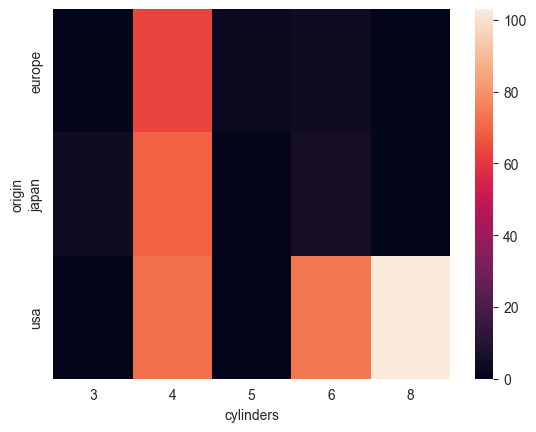

In [6]:
#creating the heatmap
sns.heatmap(origin_cylinder)

<Axes: >

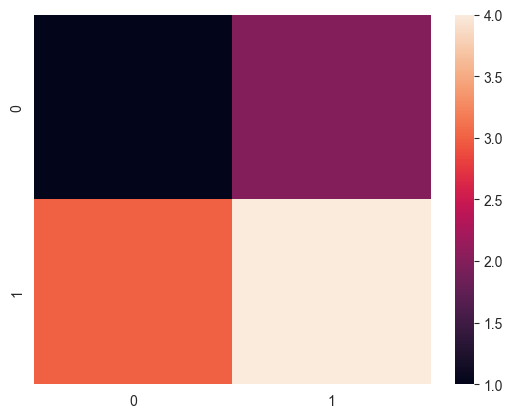

In [7]:
#note that we can also pass a numpy array instead of a dataframe
test_array=np.array([[1,2],[3,4]])
sns.heatmap(test_array)

origin     europe  japan    usa
cylinders                      
3             0.0    4.0    0.0
4            63.0   69.0   72.0
5             3.0    0.0    0.0
6             4.0    6.0   74.0
8             0.0    0.0  103.0


<Axes: xlabel='origin', ylabel='cylinders'>

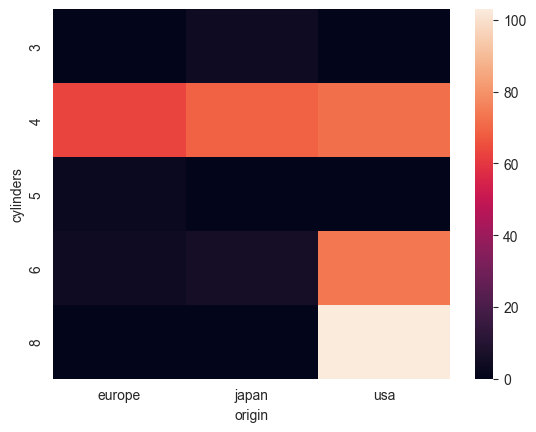

In [9]:
print(origin_cylinder.T)
sns.heatmap(origin_cylinder.T)

In [10]:
#CORRELATION MATRIX
print(cars.corr())
print('\n')
sns.heatmap(cars.corr())

ValueError: could not convert string to float: 'usa'

We can also change the colour palettes of our heatmaps:

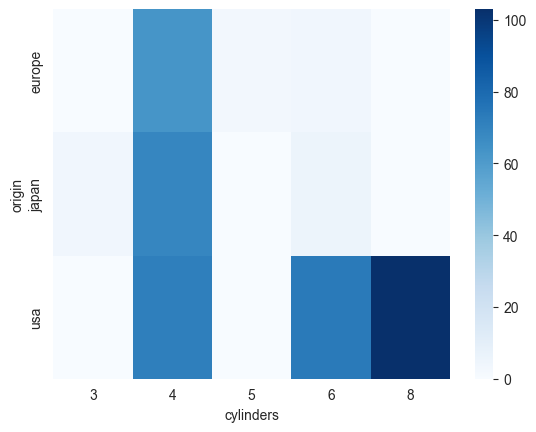

In [11]:
#To get a single coloured heatmap
sns.heatmap(origin_cylinder,cmap='Blues')

In [12]:
#Incase we want to highlight both the lower and the higher values, we can use a
#2 coloured heatmap
sns.heatmap(cars.corr(),cmap='RdBu')
plt.show()
#Note that here our center value is not exactly at 0. If we want to set our center
#to a specific value:
sns.heatmap(cars.corr(),cmap='RdBu',center=0)
plt.show()

ValueError: could not convert string to float: 'usa'

In [13]:
#Also, we can set what value will correspond to our minimum and maximum value
sns.heatmap(cars.corr,cmap='RdBu',center=0,vmin=-1,vmax=1)

ValueError: Must pass 2-d input. shape=()

<Axes: xlabel='cylinders', ylabel='origin'>

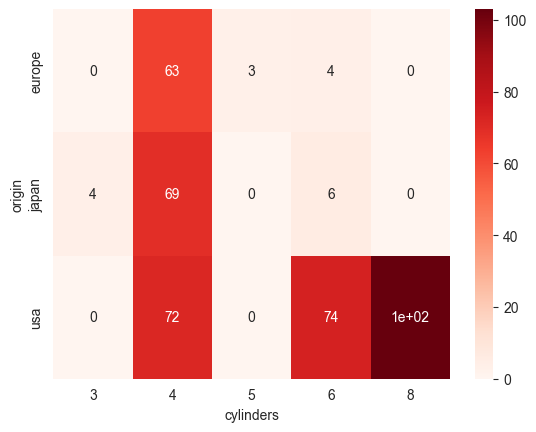

In [14]:
#We can also annotate our values on our heatmap
sns.heatmap(origin_cylinder,cmap='Reds',annot=True)

<Axes: xlabel='cylinders', ylabel='origin'>

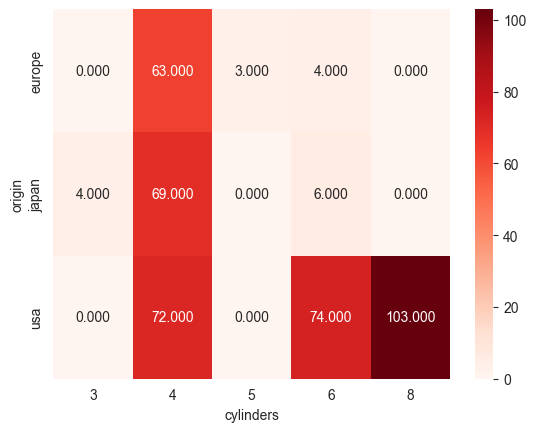

In [15]:
#here to switch off the scientific notation and see the values normally with decimals:
sns.heatmap(origin_cylinder,cmap='Reds',annot=True,fmt='.3f') #fmt=.3f will give us a value with 3 decimal places

In [ ]:
#we can also change the font style,size etc of the annotations
sns.heatmap(origin_cylinder,cmap='Reds',annot=True,fmt='.2f',annot_kws={'fontsize':16,
                                                                        'fontweight':'bold',
                                                                        'fontfamily':'serif',
                                                                        #'color':''black'
                                                                        })
#note that we can also change the color but it is not advised since we might loose visibility of the annotations sometimes

In [16]:
#ADVANCED STYLING

#Putting a line between each of the rectangles
sns.heatmap(cars.corr(),cmap='RdBu',linewidth=1,linecolor='black') #the default linecolor is white

ValueError: could not convert string to float: 'usa'